In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.cluster import SpectralBiclustering


In [2]:
# version = 'old'
version = 'clare_basis'
# version = 'clare_all'


if version == 'old':
    fn = 'result_logfc_matrix_2020_08_27.csv' ## data set without Claire's screens
elif version == 'clare_all':
    fn = 'result_logfc_matrix_2021_08_27.csv' ## data set with all of Claire's pairwise combinations
elif version == 'clare_basis':
    fn = 'result_logfc_matrix_2021_08_27_BASIS.csv' ## data set only Claire's mutant vs. wildtype screens

path = '../data/standardized_data/'
df_lfc = pd.read_csv(os.path.join(path, fn), index_col = 0)
df_lfc.shape


(4055, 125)

In [4]:
df_lfc = df_lfc.dropna(axis=0)
data = df_lfc.values

df_lfc.shape

(3971, 125)

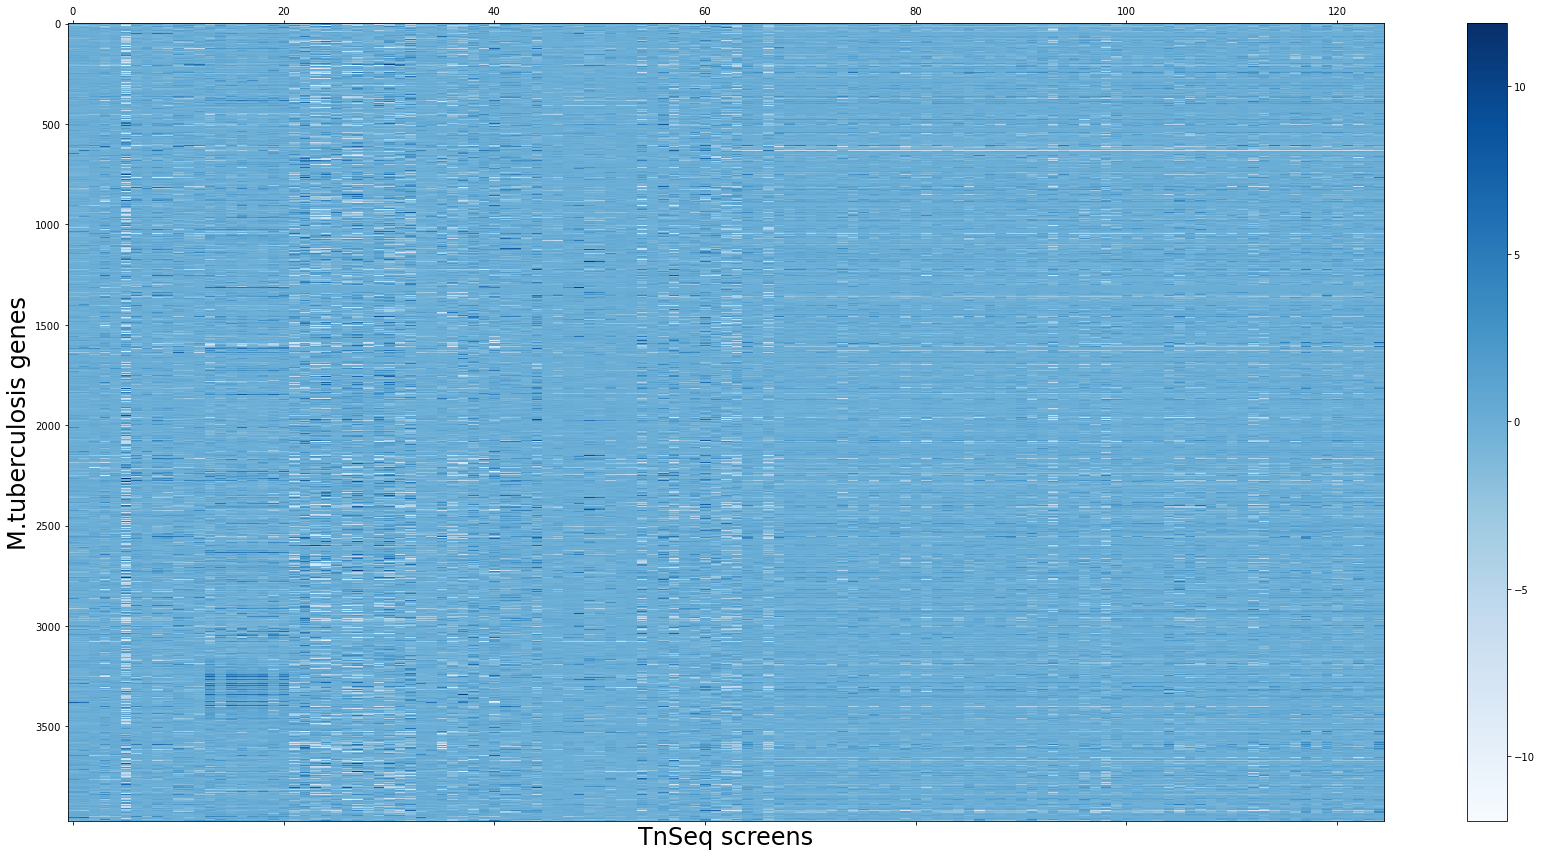

In [5]:
fig, ax = plt.subplots(figsize = (24, 12))

shw = ax.matshow(df_lfc.values, aspect='auto', cmap=plt.cm.Blues)
plt.colorbar(shw)
# xl = ax.set_xticklabels(cols_clus)
xl = plt.xlabel('TnSeq screens', fontsize = 24)
xl = plt.ylabel('M.tuberculosis genes', fontsize = 24)
plt.tight_layout()
fn_fig = '../figures/Adrian_classification/TnSeqMat_HeatMap_no_clustering.png'
plt.savefig(fn_fig, dpi = 300)

In [39]:
n_clusters = (20,20)
model = SpectralBiclustering(n_clusters=n_clusters, random_state=0) #, method = 'log'
model.fit(data)


SpectralBiclustering(n_clusters=(20, 20), random_state=0)

In [40]:
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

In [55]:
cols_clus = df_lfc.columns[np.argsort(model.column_labels_)]
rv_id_clus = df_lfc.index[np.argsort(model.row_labels_)]


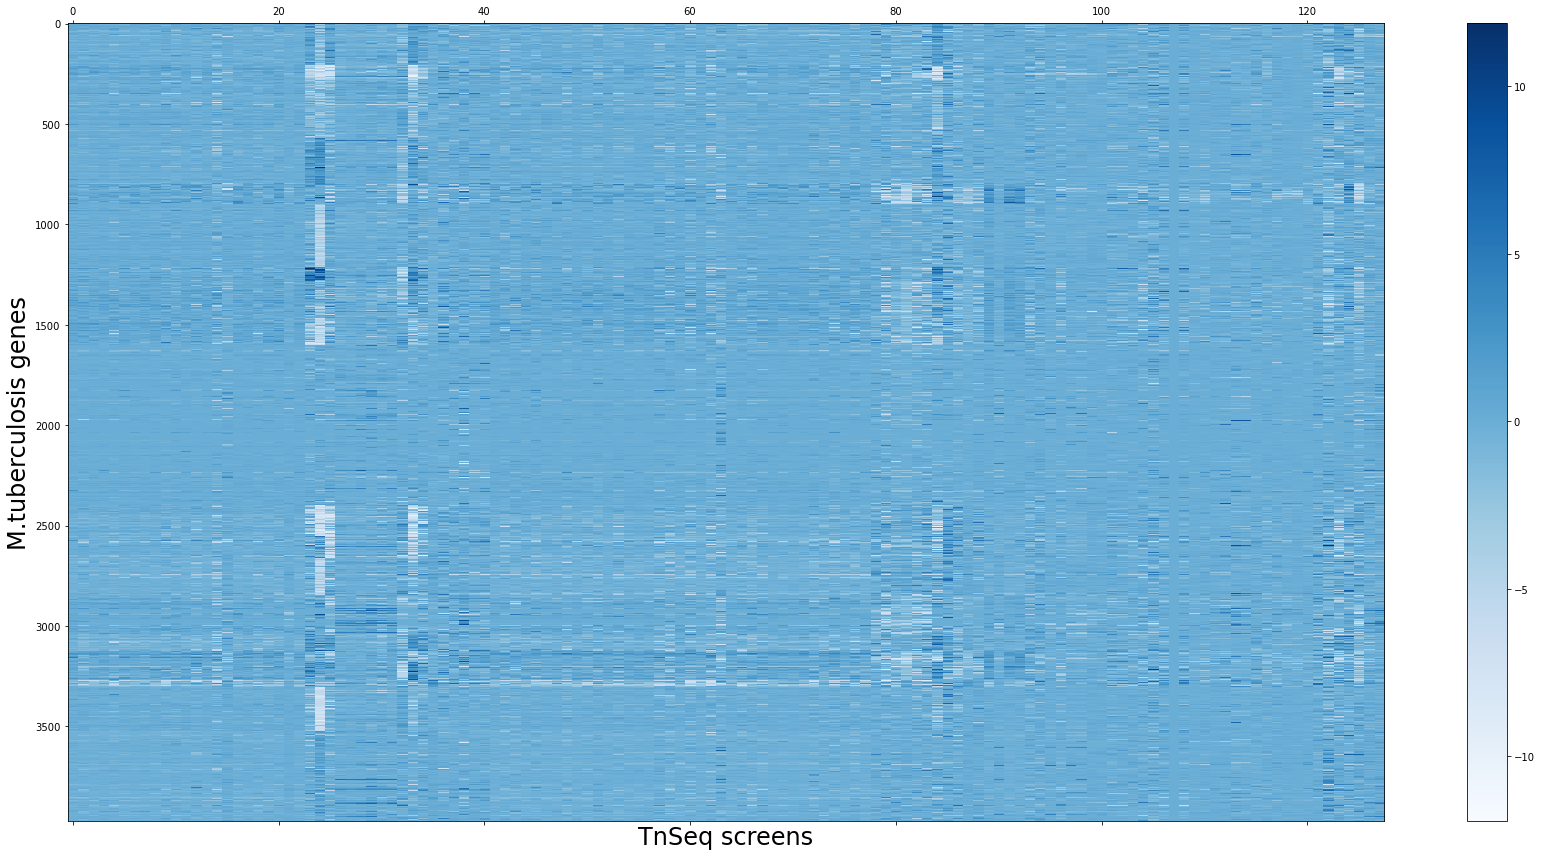

In [70]:
fig, ax = plt.subplots(figsize = (24, 12))

shw = ax.matshow(fit_data, aspect='auto', cmap=plt.cm.Blues)
plt.colorbar(shw)
# xl = ax.set_xticklabels(cols_clus)
xl = plt.xlabel('TnSeq screens', fontsize = 24)
xl = plt.ylabel('M.tuberculosis genes', fontsize = 24)
plt.tight_layout()
fn_fig = '../figures/Adrian_classification/TnSeqMat_HeatMap.png'
plt.savefig(fn_fig, dpi = 300)